In [596]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import math

In [597]:
df = pd.read_csv("dataset/place.txt")
df

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57
...,...,...
195,6.93,2.46
196,5.89,2.57
197,7.21,3.24
198,7.63,3.96


In [598]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cgpa     200 non-null    float64
 1   package  200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [599]:
df.describe()

,cgpa,package
count,200.000000,200.000000
mean,6.990500,2.996050
std,1.069409,0.691644
min,4.260000,1.370000
25%,6.190000,2.487500
50%,6.965000,2.995000
75%,7.737500,3.492500
max,9.580000,4.620000


In [600]:
df.isnull().sum()

cgpa       0
package    0
dtype: int64

In [601]:
x= pd.DataFrame(df.iloc[:,0])
x

,cgpa
0,6.89
1,5.12
2,7.82
3,7.42
4,6.94
...,...
195,6.93
196,5.89
197,7.21
198,7.63


In [602]:
y = df.iloc[:,1]
y

0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64

In [603]:
x_train,x_test,y_train,y_test=train_test_split(x,y ,test_size=0.2,random_state=2)

In [604]:
x_train

,cgpa
137,7.14
163,8.93
111,5.42
123,5.10
109,7.77
...,...
43,7.66
22,6.14
72,7.78
15,7.25


In [605]:
x_test

,cgpa
112,8.58
29,7.15
182,5.88
199,6.22
193,4.57
85,4.79
10,5.32
54,6.86
115,8.35
35,6.87


In [606]:
y_train

137    3.13
163    3.91
111    2.25
123    2.30
109    4.06
       ... 
43     2.76
22     2.30
72     3.62
15     3.23
168    3.52
Name: package, Length: 160, dtype: float64

In [607]:
y_test

112    4.10
29     3.49
182    2.08
199    2.33
193    1.94
85     1.48
10     1.86
54     3.09
115    4.21
35     2.87
12     3.65
92     4.00
13     2.89
126    2.60
174    2.99
2      3.25
44     1.86
3      3.67
113    2.37
14     3.42
23     2.48
25     3.65
6      2.60
134    2.83
165    4.08
173    2.56
45     3.58
65     3.81
48     4.09
122    2.01
178    3.63
64     2.92
9      3.51
57     1.94
78     2.21
71     3.34
128    3.34
176    3.23
131    2.01
53     2.61
Name: package, dtype: float64

### Simple Linear Regression

In [608]:
lr=LinearRegression()

In [609]:
lr.fit(x_train,y_train)

LinearRegression()

In [610]:
y_pred=lr.predict(x_test)
y_pred

array([3.89111601, 3.09324469, 2.38464568, 2.57434935, 1.6537286 ,
       1.77647803, 2.07219258, 2.93143862, 3.76278706, 2.93701814,
       4.09197872, 3.51170867, 2.97049525, 2.40138424, 3.18809652,
       3.46707251, 1.94386362, 3.24389172, 2.97607477, 3.41685683,
       2.55761079, 3.16577844, 2.85890486, 3.12114229, 3.68467378,
       2.8700639 , 3.49497011, 3.34432308, 3.91901361, 1.96060218,
       3.65119666, 3.2104146 , 3.74046898, 2.7863711 , 2.78079158,
       3.27178932, 3.52844723, 2.61340599, 2.65804215, 2.71383735])

In [611]:
lr_score=r2_score(y_test , y_pred)
lr_score

0.780730147510384

In [612]:
lr_mse = mean_squared_error( y_test , y_pred)
lr_mse

0.12129235313495527

In [613]:
lr_mae = mean_absolute_error( y_test ,y_pred)
lr_mae

0.2884710931878175

In [614]:
lr_rmse = np.sqrt(lr_mse)
lr_rmse

0.34827051717731616

#### RandomForestRegressor

In [615]:
from sklearn.ensemble import RandomForestRegressor

In [616]:
rfr = RandomForestRegressor(n_estimators =100 , random_state=0)

In [617]:
rfr.fit(x_train,y_train)

RandomForestRegressor(random_state=0)

In [618]:
y_pred1 = rfr.predict(x_test)
y_pred1

array([4.01535   , 3.07161667, 2.51544425, 2.51506667, 1.5274    ,
       1.5779    , 2.03739   , 3.09366833, 3.83196   , 3.149435  ,
       4.1343    , 3.50698333, 2.66027833, 2.46505   , 3.142615  ,
       3.5528    , 2.0616    , 3.2147    , 3.19908452, 3.6267    ,
       2.66471667, 3.11092095, 3.1583    , 2.67413333, 3.5338    ,
       2.7182    , 3.18115   , 3.1218    , 4.07775   , 1.8656    ,
       3.6863    , 3.1987    , 3.5429    , 2.89551333, 2.89441333,
       2.9792    , 3.87596667, 2.8196    , 2.5788    , 2.808     ])

In [619]:
rfr_score =r2_score(y_test,y_pred1)
rfr_score

0.7048919868621597

In [620]:
rfr_mse = mean_squared_error( y_test , y_pred1)
rfr_mse

0.16324335031039014

In [621]:
rfr_mae = mean_absolute_error( y_test ,y_pred1)
rfr_mae

0.3357630287698414

In [622]:
rfr_rmse = np.sqrt(rfr_mse)
rfr_rmse

0.40403384797611963

#### SVR

In [623]:
from sklearn.svm import SVR

In [624]:
svr = SVR(kernel = 'rbf')
svr.fit(x_train ,y_train)

SVR()

In [625]:
y_pred2 = svr.predict(x_test)
y_pred2

array([3.9404953 , 3.08322305, 2.39316608, 2.61938084, 1.54776871,
       1.6045154 , 1.97998245, 2.9658129 , 3.85438947, 2.96988092,
       4.04207188, 3.5772923 , 2.99388329, 2.41339177, 3.16581861,
       3.51558963, 1.79559327, 3.2238153 , 2.99783728, 3.44527595,
       2.59974216, 3.14469917, 2.90999322, 3.10569945, 3.78465132,
       2.91900654, 3.55434677, 3.34632961, 3.95603378, 1.81889656,
       3.7499406 , 3.18811073, 3.83602282, 2.8467559 , 2.84154096,
       3.25563638, 3.5999126 , 2.66466013, 2.71506576, 2.77514689])

In [626]:
svr_score = r2_score(y_test, y_pred2)
svr_score

0.7719427993674634

In [627]:
svr_mse = mean_squared_error( y_test , y_pred2)
svr_mse

0.12615320437359695

In [628]:
svr_mae = mean_absolute_error( y_test ,y_pred2)
svr_mae

0.2951826040245443

In [629]:
svr_rmse = np.sqrt(svr_mse)
svr_rmse

0.3551805236405805

### Lasso

In [630]:
from sklearn.linear_model import Lasso

In [631]:
la=Lasso(alpha=3.0)

In [632]:
la.fit(x_train,y_train)

Lasso(alpha=3.0)

In [633]:
y_pred3 = lr.predict(x_test)
y_pred3

array([3.89111601, 3.09324469, 2.38464568, 2.57434935, 1.6537286 ,
       1.77647803, 2.07219258, 2.93143862, 3.76278706, 2.93701814,
       4.09197872, 3.51170867, 2.97049525, 2.40138424, 3.18809652,
       3.46707251, 1.94386362, 3.24389172, 2.97607477, 3.41685683,
       2.55761079, 3.16577844, 2.85890486, 3.12114229, 3.68467378,
       2.8700639 , 3.49497011, 3.34432308, 3.91901361, 1.96060218,
       3.65119666, 3.2104146 , 3.74046898, 2.7863711 , 2.78079158,
       3.27178932, 3.52844723, 2.61340599, 2.65804215, 2.71383735])

In [634]:
la_score = r2_score(y_test , y_pred3)
la_score

0.780730147510384

In [635]:
la_mse = mean_squared_error( y_test , y_pred3)
la_mse

0.12129235313495527

In [636]:
la_mae = mean_absolute_error( y_test ,y_pred3)
la_mae

0.2884710931878175

In [637]:
la_rmse = np.sqrt(la_mse)
la_rmse

0.34827051717731616

In [638]:
df1 = pd.DataFrame({'r2_score':[lr_score,rfr_score,svr_score,la_score],
                    'MSE':[lr_mse,rfr_mse,svr_mse,la_mse],
                    'MAE':[lr_mae,rfr_mae,svr_mae,la_mae],
                    'RMSE':[lr_rmse,rfr_rmse,svr_rmse,la_rmse]}
                   , index = ['LinearRegression','RandomForestRegressor' ,'SVR','Lasso'])
df1

,r2_score,MSE,MAE,RMSE
LinearRegression,0.780730,0.121292,0.288471,0.348271
RandomForestRegressor,0.704892,0.163243,0.335763,0.404034
SVR,0.771943,0.126153,0.295183,0.355181
Lasso,0.780730,0.121292,0.288471,0.348271


In [639]:
df1.index

Index(['LinearRegression', 'RandomForestRegressor', 'SVR', 'Lasso'], dtype='object')

In [640]:
df1.iloc[:,:]

,r2_score,MSE,MAE,RMSE
LinearRegression,0.780730,0.121292,0.288471,0.348271
RandomForestRegressor,0.704892,0.163243,0.335763,0.404034
SVR,0.771943,0.126153,0.295183,0.355181
Lasso,0.780730,0.121292,0.288471,0.348271


TypeError: only size-1 arrays can be converted to Python scalars

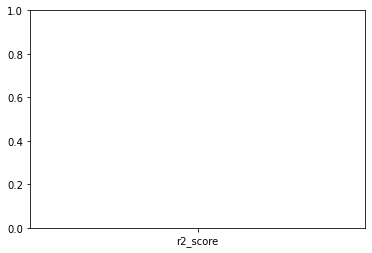

In [642]:
import seaborn as sns
y=df1.columns
x=df1.iloc[:,:]
plt.bar(y,x)